In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. 파일 불러오기
sal_data_23 = pd.read_csv('2023_연봉_statiz.csv')
sal_data_24 = pd.read_csv('2024_연봉_statiz.csv')
sal_data_25 = pd.read_csv('2025_연봉_statiz.csv')

In [3]:
# 연도별 데이터프레임 
sal_data_23['연도'] = 2023
sal_data_24['연도'] = 2024
sal_data_25['연도'] = 2025

# 파일 병합하기 
sal_total = pd.concat([sal_data_23, sal_data_24, sal_data_25], ignore_index=True)
sal_total

,선수,연봉(만원),WAR,WAR당 연봉,팀,pid,연도
0,채은성,180000,2.36,76221,한화 이글스,11215,2023
1,최재훈,80000,3.90,20492,한화 이글스,10170,2023
2,스미스,70000,0.09,756875,한화 이글스,15540,2023
3,오그레디,70000,-0.87,-80365,한화 이글스,15541,2023
4,이태양,66000,1.44,45702,한화 이글스,10609,2023
...,...,...,...,...,...,...,...
2558,김주훈,3000,-,-,키움 히어로즈,16129,2025
2559,서유신,3000,-0.24,-12551,키움 히어로즈,15483,2025
2560,박성빈,3000,-,-,키움 히어로즈,15479,2025
2561,이우석,1500,-,-,키움 히어로즈,11360,2025


In [4]:
df = sal_total.copy()
df['연봉(만원)'] = pd.to_numeric(df['연봉(만원)'], errors='coerce')
#df = df.drop('WAR당 연봉', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2563 entries, 0 to 2562
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   선수       2563 non-null   object 
 1   연봉(만원)   2534 non-null   float64
 2   WAR      2563 non-null   object 
 3   WAR당 연봉  2563 non-null   object 
 4   팀        2563 non-null   object 
 5   pid      2563 non-null   int64  
 6   연도       2563 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 140.3+ KB


In [5]:
df['WAR'] = pd.to_numeric(df['WAR'], errors='coerce').fillna(0)
df

,선수,연봉(만원),WAR,WAR당 연봉,팀,pid,연도
0,채은성,180000.0,2.36,76221,한화 이글스,11215,2023
1,최재훈,80000.0,3.90,20492,한화 이글스,10170,2023
2,스미스,70000.0,0.09,756875,한화 이글스,15540,2023
3,오그레디,70000.0,-0.87,-80365,한화 이글스,15541,2023
4,이태양,66000.0,1.44,45702,한화 이글스,10609,2023
...,...,...,...,...,...,...,...
2558,김주훈,3000.0,0.00,-,키움 히어로즈,16129,2025
2559,서유신,3000.0,-0.24,-12551,키움 히어로즈,15483,2025
2560,박성빈,3000.0,0.00,-,키움 히어로즈,15479,2025
2561,이우석,1500.0,0.00,-,키움 히어로즈,11360,2025


In [6]:
# 팀별/전체 연봉순위 파생변수 생성
df['연봉'] = df['연봉(만원)']

# 팀별 연봉순위 (1등 = 가장 연봉 높은 선수)
df['팀연봉순위'] = df.groupby('팀')['연봉'].rank(ascending=False, method='first')

# 전체 연봉순위
df['전체연봉순위'] = df['연봉'].rank(ascending=False, method='first')

# 연봉이 NaN인 선수 삭제
df = df.dropna(subset=['연봉'])
df

,선수,연봉(만원),WAR,WAR당 연봉,팀,pid,연도,연봉,팀연봉순위,전체연봉순위
0,채은성,180000.0,2.36,76221,한화 이글스,11215,2023,180000.0,3.0,12.0
1,최재훈,80000.0,3.90,20492,한화 이글스,10170,2023,80000.0,9.0,94.0
2,스미스,70000.0,0.09,756875,한화 이글스,15540,2023,70000.0,10.0,113.0
3,오그레디,70000.0,-0.87,-80365,한화 이글스,15541,2023,70000.0,11.0,114.0
4,이태양,66000.0,1.44,45702,한화 이글스,10609,2023,66000.0,12.0,128.0
...,...,...,...,...,...,...,...,...,...,...
2557,송지후,3000.0,-0.34,-8727,키움 히어로즈,16130,2025,3000.0,243.0,2527.0
2558,김주훈,3000.0,0.00,-,키움 히어로즈,16129,2025,3000.0,244.0,2528.0
2559,서유신,3000.0,-0.24,-12551,키움 히어로즈,15483,2025,3000.0,245.0,2529.0
2560,박성빈,3000.0,0.00,-,키움 히어로즈,15479,2025,3000.0,246.0,2530.0


In [7]:
# 1. '연도'를 제외한 나머지 컬럼 순서 가져오기
cols = [col for col in df.columns if col != '연도']

# 2. 맨 마지막에 '연도'를 붙이기
cols.append('연도')

# 3. 새로운 순서로 데이터프레임 재정렬
df = df[cols]
df

,선수,연봉(만원),WAR,WAR당 연봉,팀,pid,연봉,팀연봉순위,전체연봉순위,연도
0,채은성,180000.0,2.36,76221,한화 이글스,11215,180000.0,3.0,12.0,2023
1,최재훈,80000.0,3.90,20492,한화 이글스,10170,80000.0,9.0,94.0,2023
2,스미스,70000.0,0.09,756875,한화 이글스,15540,70000.0,10.0,113.0,2023
3,오그레디,70000.0,-0.87,-80365,한화 이글스,15541,70000.0,11.0,114.0,2023
4,이태양,66000.0,1.44,45702,한화 이글스,10609,66000.0,12.0,128.0,2023
...,...,...,...,...,...,...,...,...,...,...
2557,송지후,3000.0,-0.34,-8727,키움 히어로즈,16130,3000.0,243.0,2527.0,2025
2558,김주훈,3000.0,0.00,-,키움 히어로즈,16129,3000.0,244.0,2528.0,2025
2559,서유신,3000.0,-0.24,-12551,키움 히어로즈,15483,3000.0,245.0,2529.0,2025
2560,박성빈,3000.0,0.00,-,키움 히어로즈,15479,3000.0,246.0,2530.0,2025


### 연봉 차이 시각화

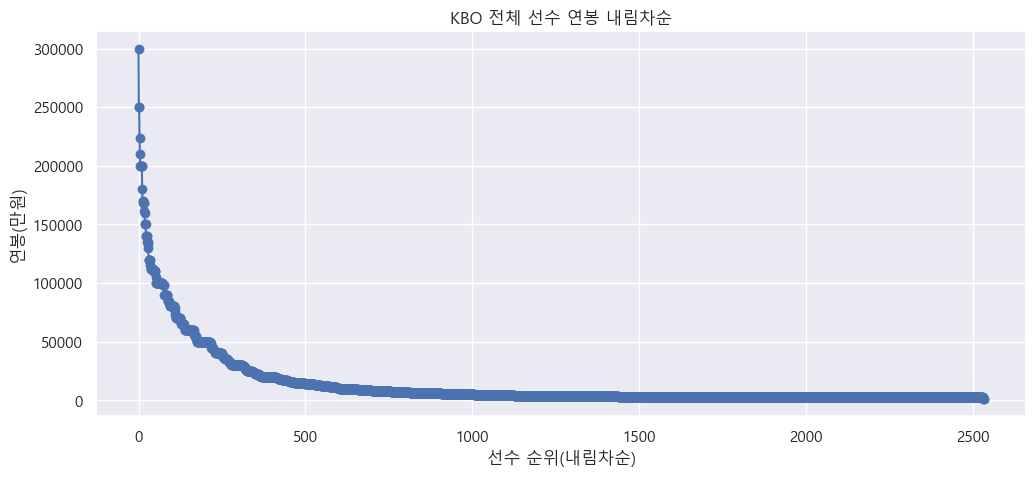

In [9]:
df_sorted = df.sort_values(by='연봉', ascending=False)

plt.figure(figsize=(12,5))
plt.plot(df_sorted['연봉'].values, marker='o')
plt.title('KBO 전체 선수 연봉 내림차순')
plt.xlabel('선수 순위(내림차순)')
plt.ylabel('연봉(만원)')
plt.grid(True)
plt.show()

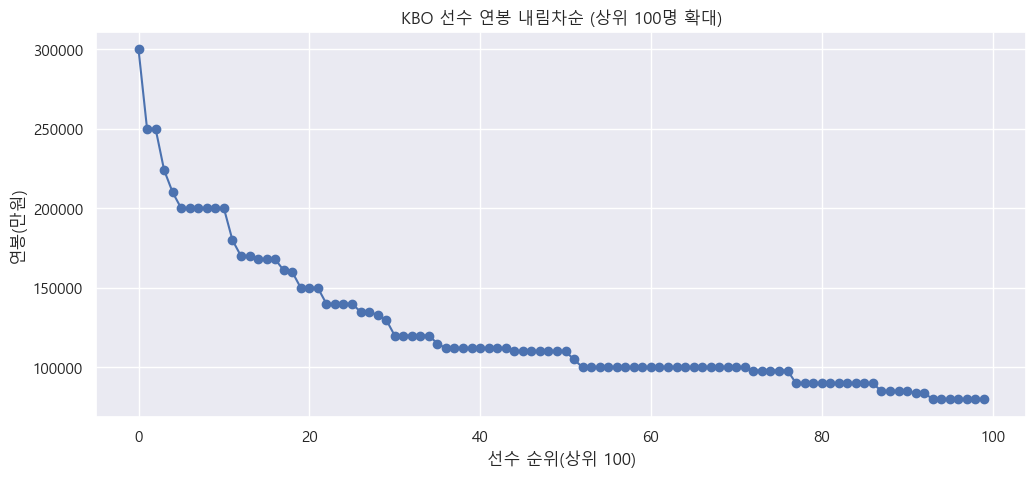

In [10]:
# 상위 100명
plt.figure(figsize=(12,5))
plt.plot(df_sorted['연봉'].values[:100], marker='o')
plt.title('KBO 선수 연봉 내림차순 (상위 100명 확대)')
plt.xlabel('선수 순위(상위 100)')
plt.ylabel('연봉(만원)')
plt.grid(True)
plt.show()

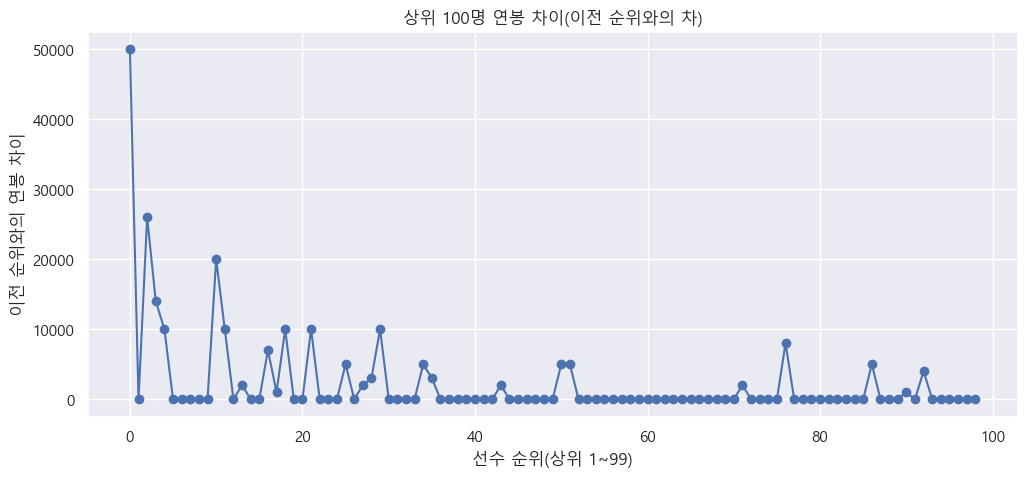

In [11]:
# 연봉 내림차순 정렬
salary_sorted = df_sorted['연봉'].values[:100]

# 각 선수 연봉의 직전 선수와의 차이(변화량)
salary_diff = salary_sorted[:-1] - salary_sorted[1:]

plt.figure(figsize=(12,5))
plt.plot(salary_diff, marker='o')
plt.title('상위 100명 연봉 차이(이전 순위와의 차)')
plt.xlabel('선수 순위(상위 1~99)')
plt.ylabel('이전 순위와의 연봉 차이')
plt.grid(True)
plt.show()

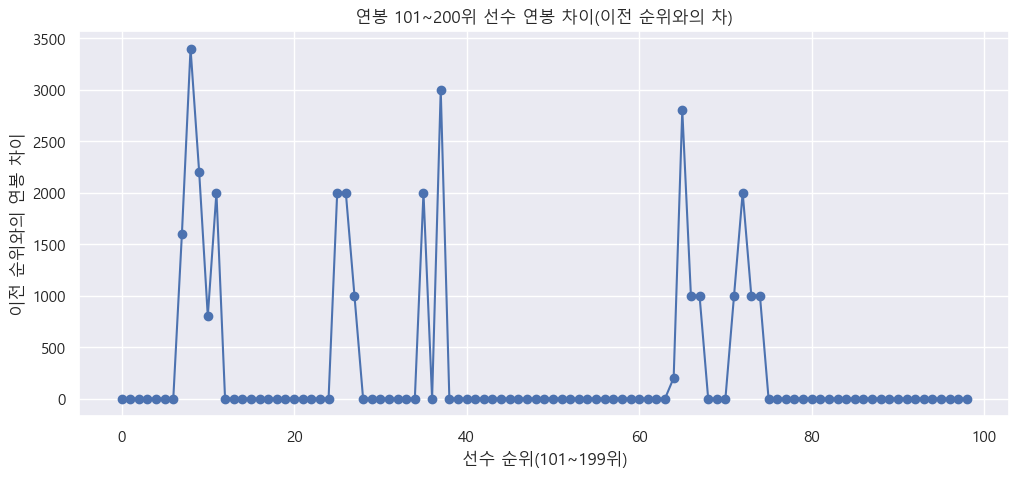

In [12]:
# 연봉 내림차순 정렬된 DataFrame에서 101~200위(=index 100~199) 뽑기
salary_sorted_101_200 = df_sorted['연봉'].values[100:200]

# 변화량 계산 (101~200위 사이 99개)
salary_diff_101_200 = salary_sorted_101_200[:-1] - salary_sorted_101_200[1:]

plt.figure(figsize=(12,5))
plt.plot(salary_diff_101_200, marker='o')
plt.title('연봉 101~200위 선수 연봉 차이(이전 순위와의 차)')
plt.xlabel('선수 순위(101~199위)')
plt.ylabel('이전 순위와의 연봉 차이')
plt.grid(True)
plt.show()